# XGBoost

# Import libraries

In [42]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset and find out exact column names

In [43]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")
# Print the first few rows and the columns of the DataFrame
print("Columns in the DataFrame:", data.columns)
print(data.head())

# Convert 'Date' to datetime, handling errors
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for NaT values after conversion
if data['Date'].isnull().any():
    print("There are unparseable dates:")
    print(data[data['Date'].isnull()])

# Check original columns
print("Original columns:", data.columns.tolist())

Columns in the DataFrame: Index(['Date', 'Close', 'Volume', 'Symbol', 'News - Positive Sentiment',
       'News - Negative Sentiment', 'News - New Products', 'News - Layoffs',
       'News - Analyst Comments', 'News - Stocks', 'News - Dividends',
       'News - Corporate Earnings', 'News - Mergers & Acquisitions',
       'News - Store Openings', 'News - Product Recalls',
       'News - Adverse Events', 'News - Personnel Changes',
       'News - Stock Rumors', 'GICS Sector', 'Headquarters Location',
       'Founded', 'Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_4',
       'Close_lag_5', 'Day', 'Month', 'Weekday'],
      dtype='object')
         Date       Close   Volume Symbol  News - Positive Sentiment  \
0  2020-09-30  100.940002  1362200      A                       14.0   
1  2020-10-01  101.220001   723600      A                        0.0   
2  2020-10-02  100.010002   712200      A                        0.0   
3  2020-10-05  103.120003   803900      A                 

C:\Users\Admin\AppData\Local\Temp\ipykernel_41300\3257892647.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")


# Drop target variable in X dataset and drop the categorical variables and lagged variables created
# Rename column names to remove spaces and characters

In [44]:
# Split features and target
X = data.drop('Close', axis=1)
X=  X.drop('Symbol', axis=1)
X = X.drop('GICS Sector', axis=1)
X = X.drop('Headquarters Location', axis=1)
X = X.drop('Founded', axis=1)
X = X.drop('Close_lag_1', axis=1)
X = X.drop('Close_lag_2', axis=1)
X = X.drop('Close_lag_3', axis=1)
X = X.drop('Close_lag_4', axis=1)
X = X.drop('Close_lag_5', axis=1)
y = data['Close']

# Extract year, month, day from 'Date' and drop 'Date' afterwards
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)  # Drop 'Date' after extracting components

# Sanitize column names
X.columns = X.columns.str.replace(r'[_\s-]', '', regex=True)  # Replace spaces and hyphens with underscores
X.columns = X.columns.str.replace(r'[<>[\]]', '', regex=True)  # Remove <, >, [, ]
X.columns = [col.strip() for col in X.columns]

print("Sanitized columns:", X.columns.tolist())






Sanitized columns: ['Volume', 'NewsPositiveSentiment', 'NewsNegativeSentiment', 'NewsNewProducts', 'NewsLayoffs', 'NewsAnalystComments', 'NewsStocks', 'NewsDividends', 'NewsCorporateEarnings', 'NewsMergers&Acquisitions', 'NewsStoreOpenings', 'NewsProductRecalls', 'NewsAdverseEvents', 'NewsPersonnelChanges', 'NewsStockRumors', 'Day', 'Month', 'Weekday', 'Year']


# Train and fit xgboost model

In [45]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)

# Create the XGBRegressor model
model = xgb.XGBRegressor()

# Fit the model (make sure to include both X_train and y_train)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# list out importance of variables

In [46]:
importances = model.feature_importances_
feature_importance = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importance)

                          importance
Volume                      0.243194
NewsNewProducts             0.157452
NewsPositiveSentiment       0.141314
Year                        0.077534
NewsAnalystComments         0.073052
NewsStocks                  0.056751
NewsNegativeSentiment       0.045984
NewsPersonnelChanges        0.040628
Month                       0.031962
NewsMergers&Acquisitions    0.028432
NewsCorporateEarnings       0.021015
Day                         0.019499
NewsStoreOpenings           0.018123
NewsAdverseEvents           0.012223
Weekday                     0.012204
NewsDividends               0.011471
NewsProductRecalls          0.004759
NewsLayoffs                 0.003114
NewsStockRumors             0.001292


# Plot feature importance

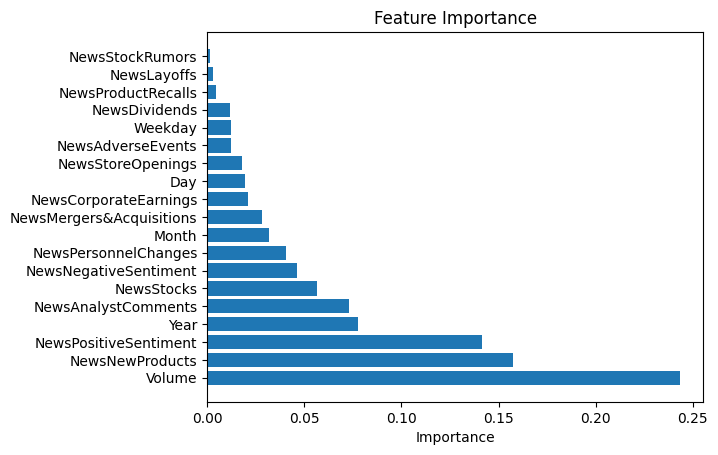

In [47]:
plt.barh(feature_importance.index, feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()